WORKFLOW OF THE PROJECT

* Data Collection - https://www.kaggle.com/datasets/altruistdelhite04/gold-price-data
* Data Preprocessing
* Data Analysis
* Train Test Split
* Random Forest Regression Algorithm

Importing the required libraries for the task

In [4]:
import numpy as np  #to convert data into numpy arrays
import pandas as pd #for data pre-processing technique and importing our data
import matplotlib.pyplot as plt #for creating data visualizations to explore the data
import seaborn as sns #for making such visualizations and creating plots
from sklearn.model_selection import train_test_split #to divide our original data into training data and testing data
from sklearn.ensemble import RandomForestRegressor #to build our regression type ml model 
from sklearn import metrics #to evaluate the accuracy of our ml model

Data Collection and processing

In [5]:
#loading the dataset into a variable data and printing the first 5 values
data = pd.read_csv('D:\Machine Learning with Python\Gold Prediction using Python\gld_price_data.csv')
data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [6]:
data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [7]:
data.shape

(2290, 6)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


From the above info, we can say that there is no missing data in the dataset and hence doesn't need much Data Preprocessing.

In [9]:
data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [10]:
data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation between various types of datasets


1. Postive Correlation - When two columns of a dataset are directly proportional to each other.
2. Negative Correlation - When two columns of a dataset are indirectly proportional to each other.

Creating a heatmap to understand the correlation between different columns

In [11]:
correlation = data.corr()

<AxesSubplot:>

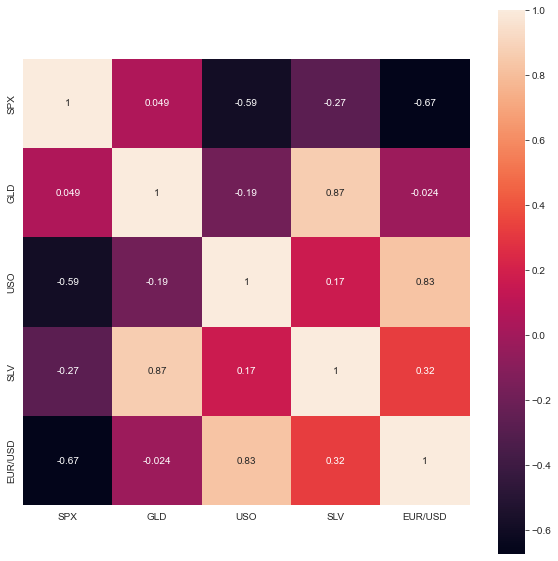

In [12]:
plt.figure(figsize = (10,10))
sns.heatmap(correlation, cbar=True, square=True, annot=True)

In [13]:
#correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

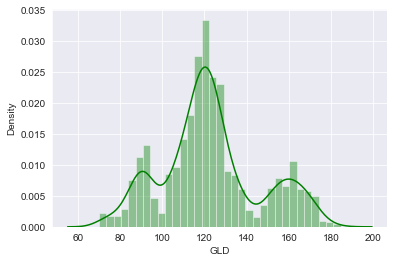

In [14]:
sns.distplot(data['GLD'],color='green')

In [15]:
X = data.drop(['Date','GLD'],axis=1)
Y = data['GLD']

In [16]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [17]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Train Test Split Data

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

Model Training: Random Forest Regressor

In [19]:
regressor = RandomForestRegressor(n_estimators=100)

In [20]:
regressor.fit(X_train,Y_train)

RandomForestRegressor()

Model Evaluation

In [21]:
test_data_prediction = regressor.predict(X_test)

In [22]:
print(test_data_prediction)

[168.70289921  81.93559987 116.17190079 127.63820122 120.70510159
 154.62159743 150.35229764 126.1513003  117.53809855 126.1911998
 116.61610128 171.93250061 141.53279864 168.07139887 115.14430007
 117.19440064 140.04010291 170.29840137 159.22460361 158.6041991
 155.01369985 125.26440013 175.89529996 157.74700306 125.24880016
  93.70849926  77.75400012 120.26069974 119.12259948 167.47230007
  88.11240038 125.06930021  91.18120074 117.66240019 121.13549937
 135.92170116 115.6165011  115.56070079 146.77190006 107.23460119
 104.12620266  87.22969816 126.41210101 118.0715998  155.14509936
 119.68430017 108.32899993 107.97159823  93.28080061 127.17779767
  74.85540034 113.69299912 121.6369002  111.32679908 118.95059922
 120.87459932 158.9846995  167.48670104 146.82579742  85.88819865
  94.29500017  86.98409904  90.47050033 118.71950091 126.40400012
 127.4706     170.26759958 122.3197996  117.47499874  98.45280011
 168.47120256 143.02299873 131.94360241 121.16130243 120.80969934
 119.7391002

Evaluation of performance of the model

In [23]:
# R squared error
error_score = metrics.r2_score(Y_test,test_data_prediction)

In [24]:
print('R squared error : ',error_score)

R squared error :  0.9891689887215578


Taking in consideration that our dataset has values in the range of 100s, 0.98 "R squared error" is really less and our model is performing well

Compare actual values and predicted values

In [25]:
Y_test = list(Y_test)

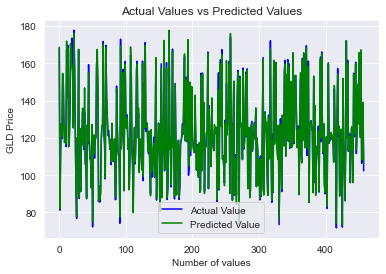

In [29]:
plt.plot(Y_test, color='blue', label='Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Values vs Predicted Values')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()